In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:/Users/91934/My_Projects/Miniproject/modified_file.csv')

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('C:/Users/91934/My_Projects/Miniproject/correct.csv')

# Define your features and target variables
X = data[['rad', 'Freq [GHz]']]
y = data[['s11', 'vswr']]

# Handling missing values in X
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)
# Note: It's important to fit the imputer on the training data and transform both the training and test data with it. This prevents data leakage.

# Splitting dataset into training and testing set after imputation
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initializing and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model for each target
mse_s11 = mean_squared_error(y_test['s11'], predictions[:, 0])
mse_vswr = mean_squared_error(y_test['vswr'], predictions[:, 1])
r2_s11 = r2_score(y_test['s11'], predictions[:, 0])
r2_vswr = r2_score(y_test['vswr'], predictions[:, 1])

print(f'MSE for s11: {mse_s11}')
print(f'MSE for vswr: {mse_vswr}')
print(f'R^2 Score for s11: {r2_s11}')
print(f'R^2 Score for vswr: {r2_vswr}')

# Saving the model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)
print(f'Model saved to {model_filename}')


MSE for s11: 20.68830450359148
MSE for vswr: 53.350759311018116
R^2 Score for s11: 0.49349481318519006
R^2 Score for vswr: 0.47981653562131166
Model saved to linear_regression_model.pkl


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('C:/Users/91934/My_Projects/Miniproject/correct.csv')

# Define your features and target variables
X = data[['rad', 'Freq [GHz]']]
y = data[['s11', 'vswr']]

# Handling missing values in X
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Splitting dataset into training and testing set after imputation and scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initializing and training the SVR model for s11
svr_s11 = SVR(kernel='rbf')
svr_s11.fit(X_train, y_train['s11'])

# Initializing and training the SVR model for vswr
svr_vswr = SVR(kernel='rbf')
svr_vswr.fit(X_train, y_train['vswr'])

# Making predictions for s11 and vswr
predictions_s11 = svr_s11.predict(X_test)
predictions_vswr = svr_vswr.predict(X_test)

# Evaluating the model for s11
mse_s11 = mean_squared_error(y_test['s11'], predictions_s11)
r2_s11 = r2_score(y_test['s11'], predictions_s11)

# Evaluating the model for vswr
mse_vswr = mean_squared_error(y_test['vswr'], predictions_vswr)
r2_vswr = r2_score(y_test['vswr'], predictions_vswr)

print(f'MSE for s11: {mse_s11}')
print(f'MSE for vswr: {mse_vswr}')
print(f'R^2 Score for s11: {r2_s11}')
print(f'R^2 Score for vswr: {r2_vswr}')

# Saving the models to files
svr_s11_filename = 'svr_s11_model.pkl'
svr_vswr_filename = 'svr_vswr_model.pkl'
joblib.dump(svr_s11, svr_s11_filename)
joblib.dump(svr_vswr, svr_vswr_filename)
print(f'Models saved to {svr_s11_filename} and {svr_vswr_filename}')


MSE for s11: 16.871294587259907
MSE for vswr: 21.507932803826304
R^2 Score for s11: 0.5522663870213382
R^2 Score for vswr: 0.8054081340743349
Models saved to svr_s11_model.pkl and svr_vswr_model.pkl


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Load your dataset
data = pd.read_csv('C:/Users/91934/My_Projects/Miniproject/final.csv')

# Preprocess the dataset: remove rows with zero values
data = data.replace(0, np.nan)  # Replace 0 values with NaN
data = data.dropna()  # Remove rows containing NaN values

# Define your features and target variables
X = data[['Split_width(g)', 'dis_b/w_rings(d)', 'Freq [GHz]']]
y = data[['s11', 'vswr']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN input (samples, time steps, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model.add(Dense(units=2))  # Output layer with 2 neurons for 's11' and 'vswr'

# Compile the model with a specified learning rate
learning_rate = 0.001 # You can adjust this value as needed
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Define a ModelCheckpoint callback to save the best model
checkpoint_filepath = 'best_model.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

# Train the model with the ModelCheckpoint callback
history = model.fit(X_train_rnn, y_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[model_checkpoint_callback], verbose=1)

# Make predictions
predictions = model.predict(X_test_rnn)

# Evaluate the model
mse_s11 = mean_squared_error(y_test['s11'], predictions[:, 0])
mse_vswr = mean_squared_error(y_test['vswr'], predictions[:, 1])
r2_s11 = r2_score(y_test['s11'], predictions[:, 0])
r2_vswr = r2_score(y_test['vswr'], predictions[:, 1])

print(f'MSE for s11: {mse_s11}')
print(f'MSE for vswr: {mse_vswr}')
print(f'R^2 Score for s11: {r2_s11}')
print(f'R^2 Score for vswr: {r2_vswr}')


Epoch 1/25
100/100 [==============================] - 1s 3ms/step - loss: 179.5899 - val_loss: 160.8544
Epoch 2/25
100/100 [==============================] - 0s 1ms/step - loss: 138.4561 - val_loss: 116.1298
Epoch 3/25


c:\Users\91934\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 0s 1ms/step - loss: 95.1347 - val_loss: 80.5034
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 68.3642 - val_loss: 62.9471
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 56.7416 - val_loss: 55.5445
Epoch 6/25
100/100 [==============================] - 0s 1ms/step - loss: 51.6238 - val_loss: 51.8462
Epoch 7/25
100/100 [==============================] - 0s 1ms/step - loss: 48.8396 - val_loss: 49.4547
Epoch 8/25
100/100 [==============================] - 0s 1ms/step - loss: 46.9391 - val_loss: 47.6566
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 45.4950 - val_loss: 46.1897
Epoch 10/25
100/100 [==============================] - 0s 1ms/step - loss: 44.3271 - val_loss: 44.9479
Epoch 11/25
100/100 [==============================] - 0s 1ms/step - loss: 43.2852 - val_loss: 43.7868
Epoch 12/25
100/100 [==============================] - 0s 1ms/step - loss: 42.3964 - val_lo

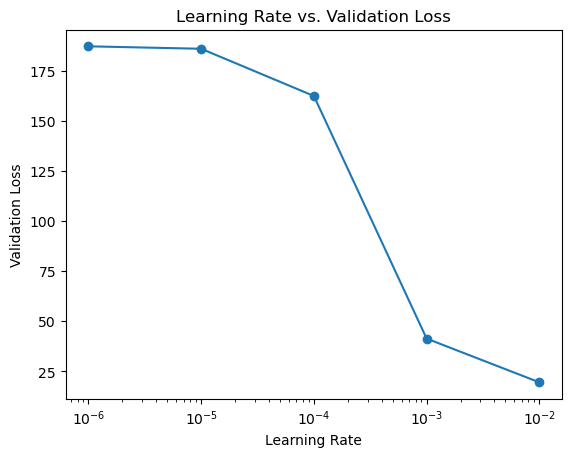

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('C:/Users/91934/My_Projects/Miniproject/final.csv')

# Preprocess the dataset: remove rows with zero values
data = data.replace(0, np.nan)  # Replace 0 values with NaN
data = data.dropna()  # Remove rows containing NaN values

# Define your features and target variables
X = data[['Split_width(g)', 'dis_b/w_rings(d)', 'Freq [GHz]']]
y = data[['s11', 'vswr']]

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN input (samples, time steps, features)
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the learning rate range
learning_rates = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

# List to store the losses for each learning rate
losses = []

for lr in learning_rates:
    # Define the RNN model
    model = Sequential()
    model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
    model.add(Dense(units=2))  # Output layer with 2 neurons for 's11' and 'vswr'

    # Compile the model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

    # Evaluate the model on validation data
    val_loss = history.history['val_loss'][-1]
    losses.append(val_loss)

# Plot the learning rate vs. loss curve
plt.plot(learning_rates, losses, marker='o')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Loss')
plt.title('Learning Rate vs. Validation Loss')
plt.show()
